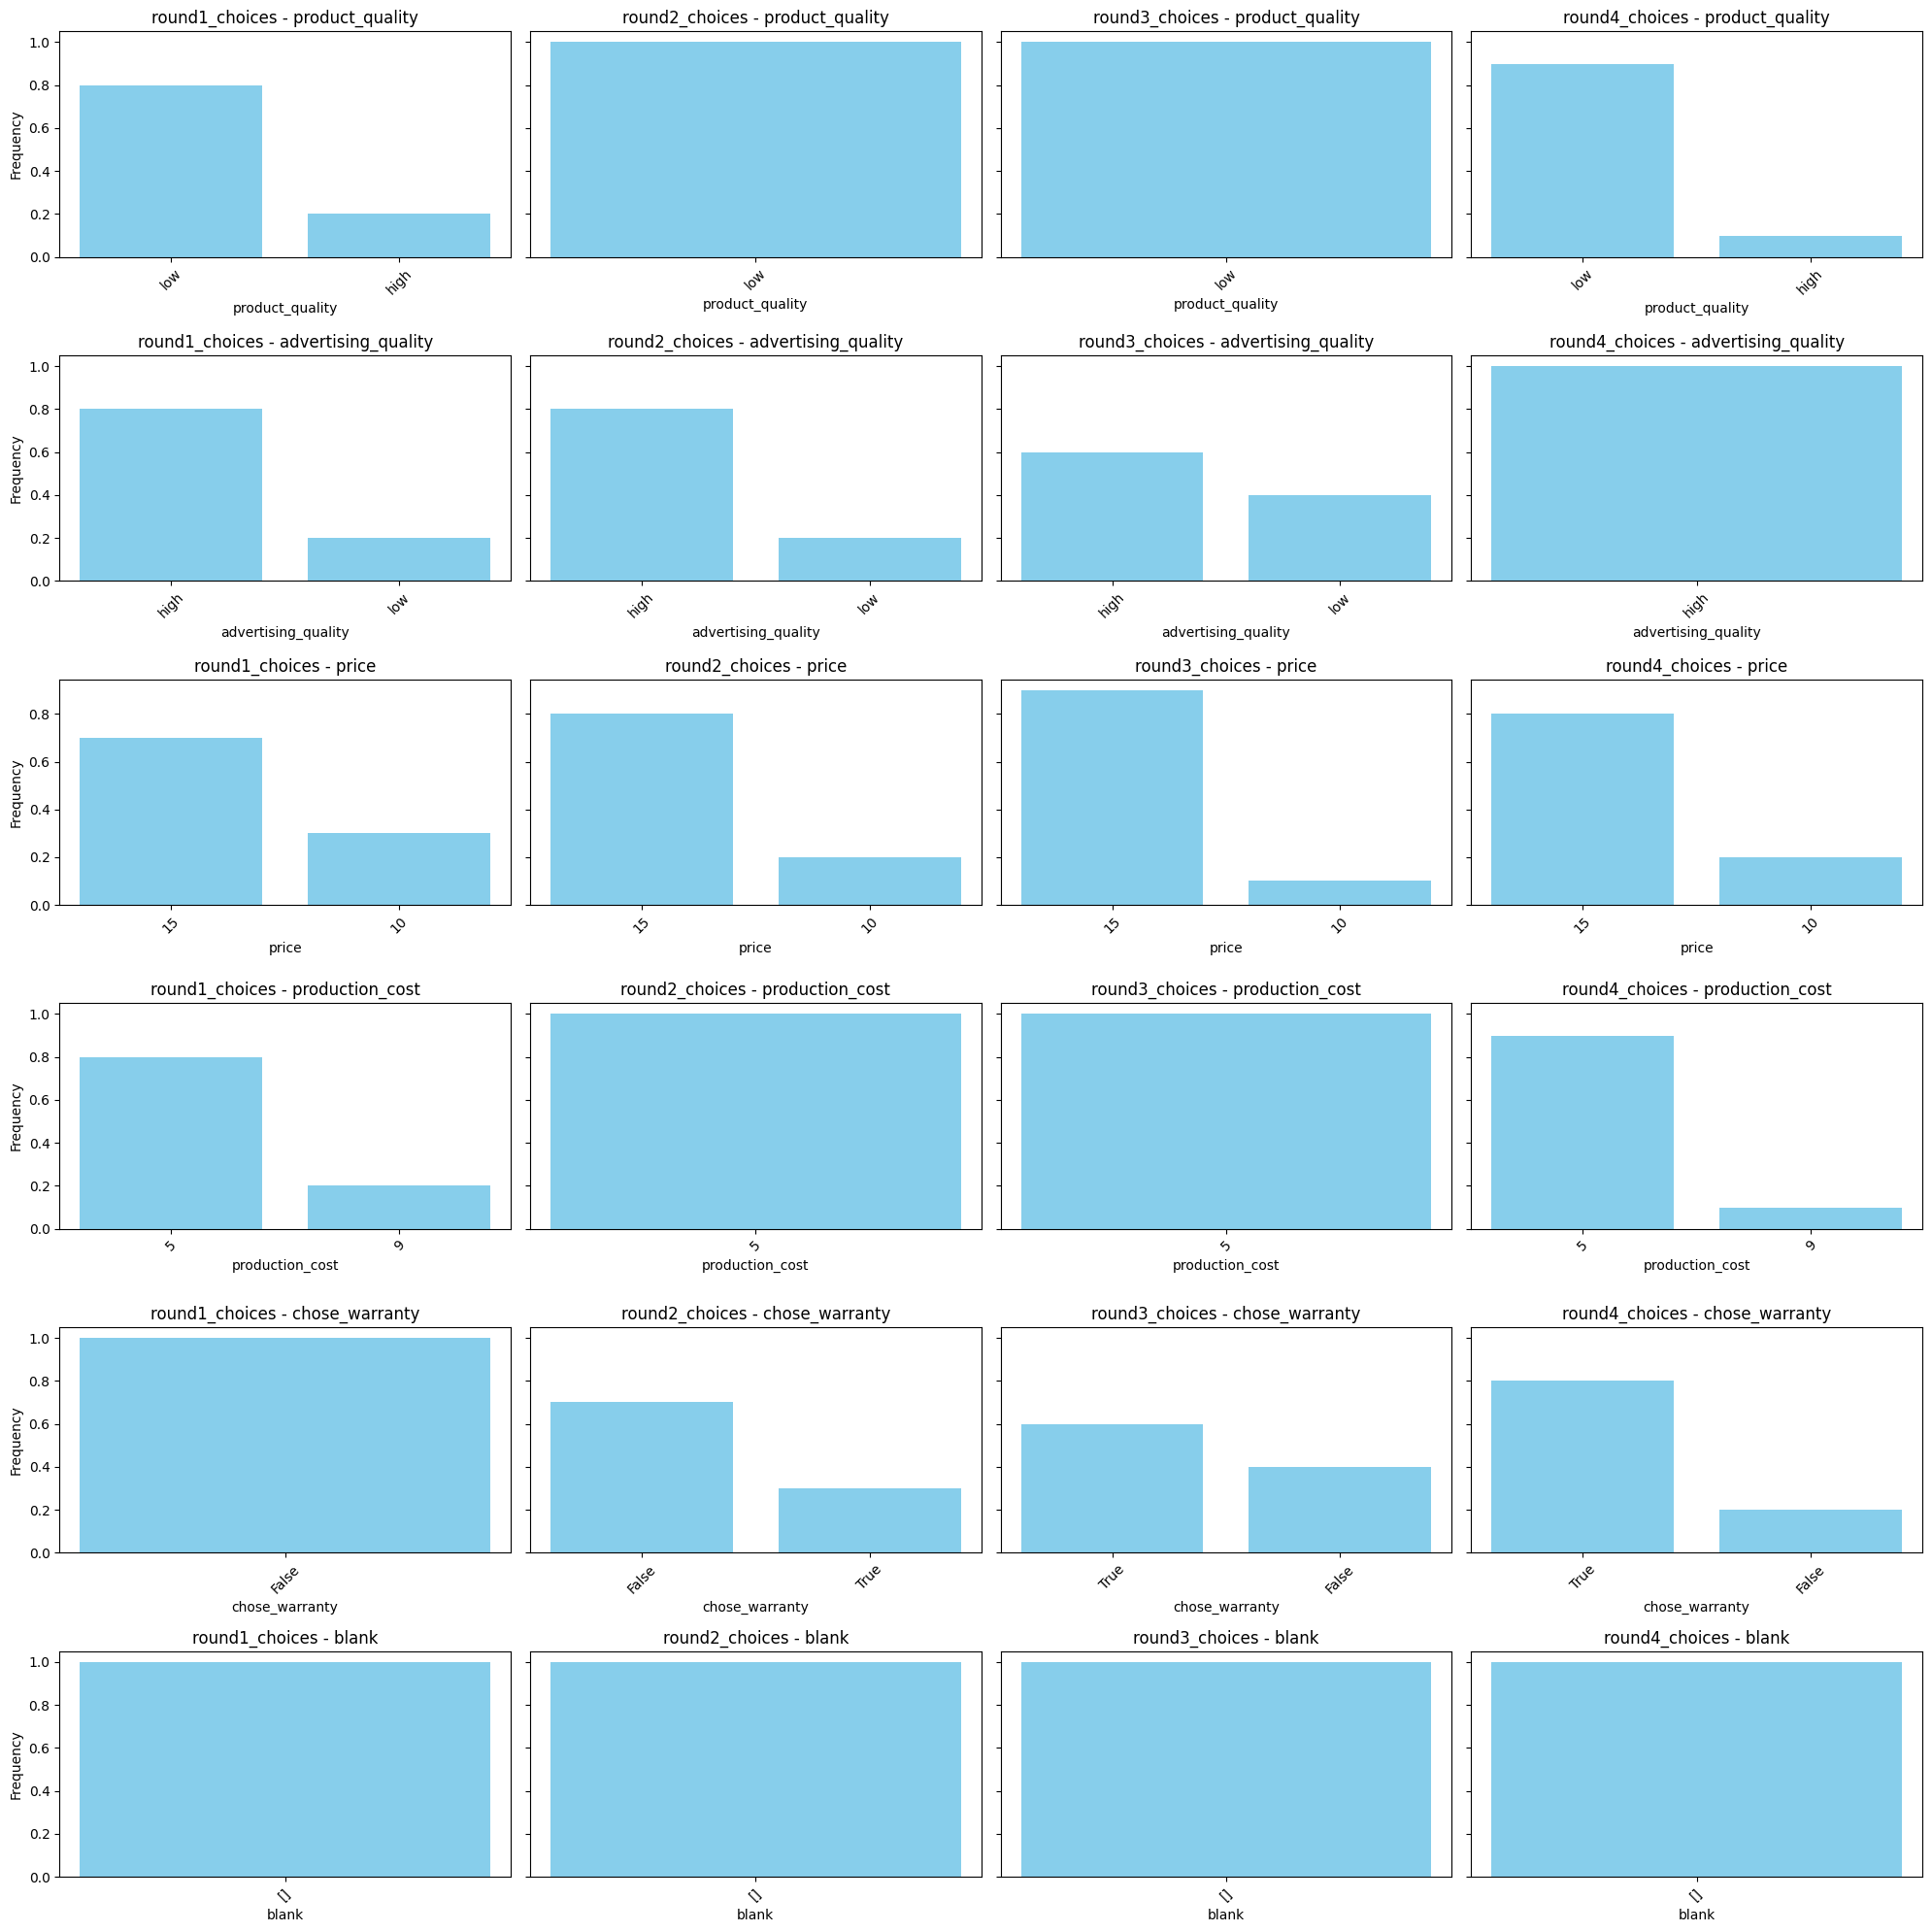

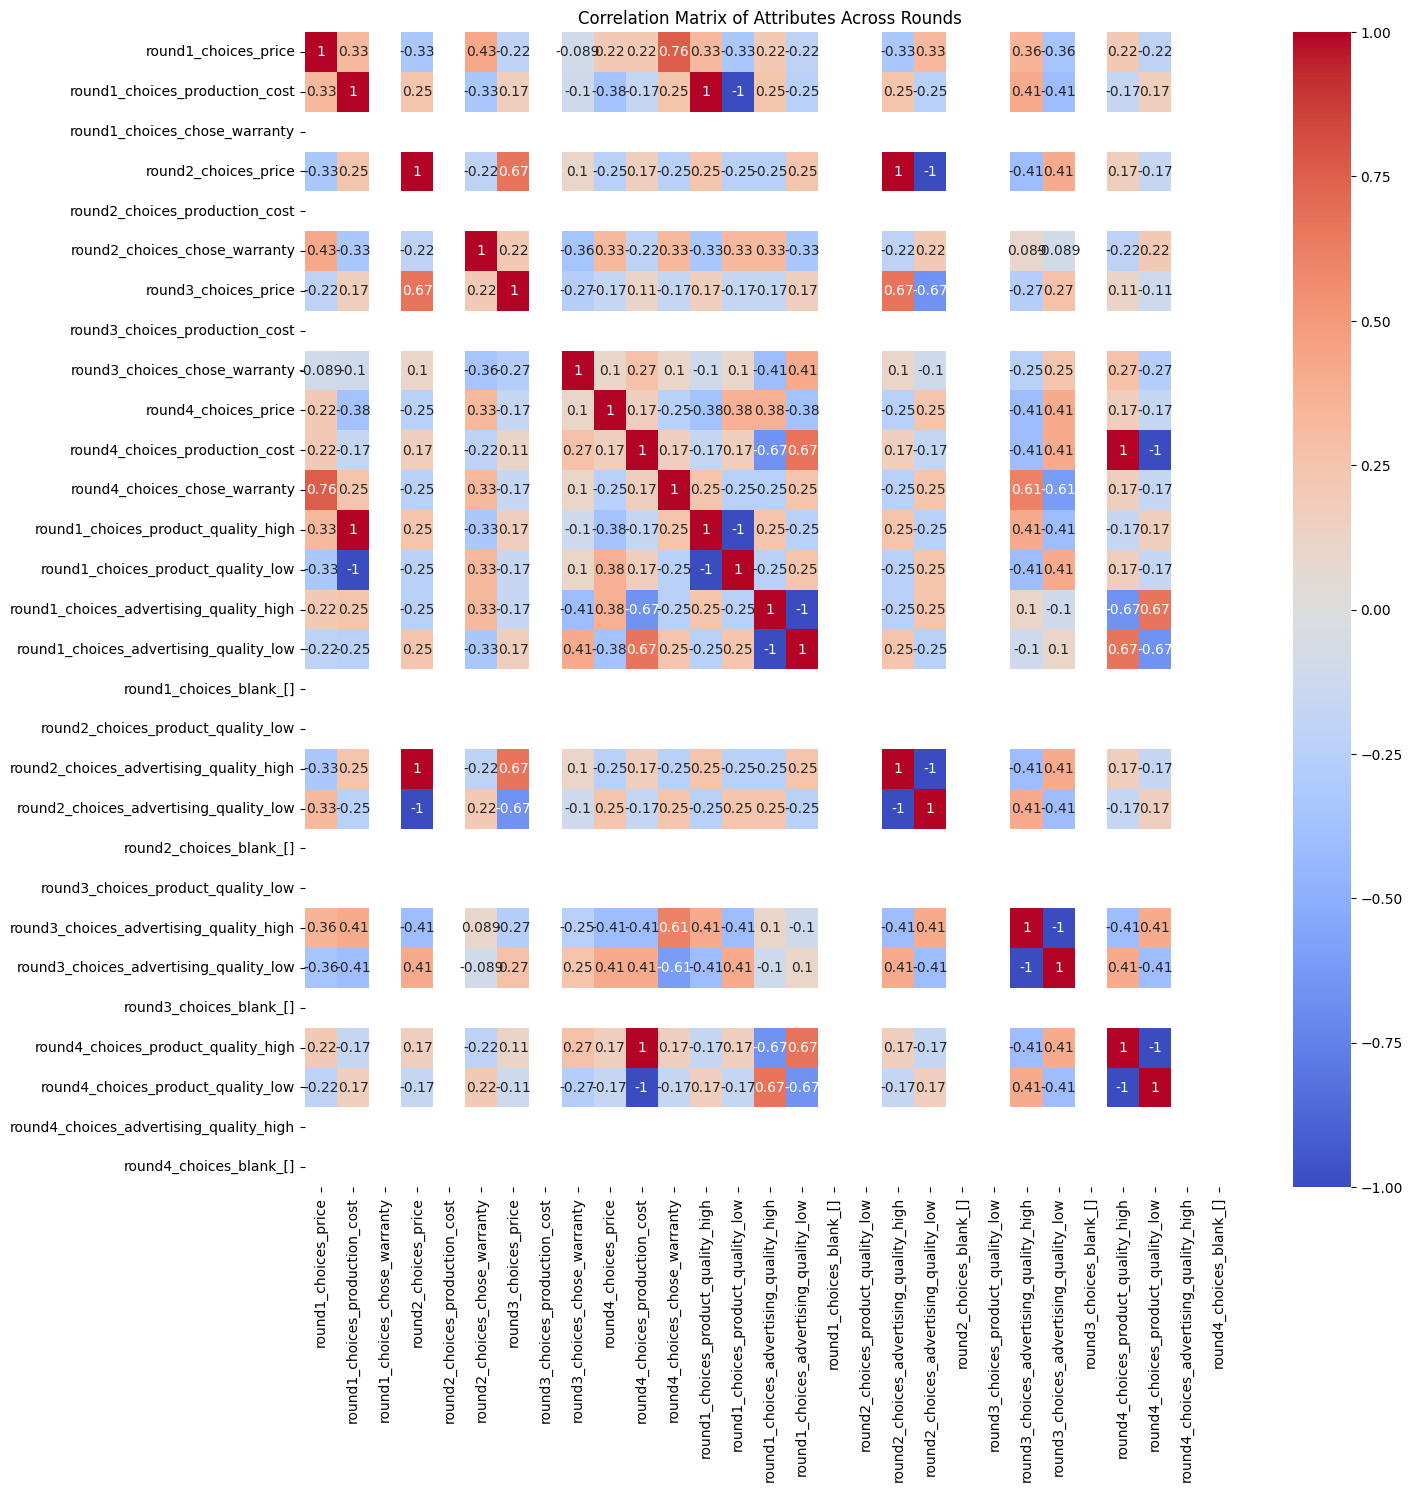

Decision Pattern for Players Starting with Low Product Quality:
      round2_choices_product_quality  round3_choices_product_quality  \
high                             NaN                             NaN   
low                              8.0                             8.0   

      round4_choices_product_quality  
high                               1  
low                                7  


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

file_path = 'default-experiment-2024-01-14-05-15-14/players.csv'
df = pd.read_csv(file_path, dtype=None, encoding=None)

rounds = ['round1_choices', 'round2_choices', 'round3_choices', 'round4_choices']
attributes = ['product_quality', 'advertising_quality', 'price', 'production_cost', 'chose_warranty', 'blank']
def extract_choices(row):
    rounds = ['round1_choices', 'round2_choices', 'round3_choices', 'round4_choices']
    attributes = ['product_quality', 'advertising_quality', 'price', 'production_cost', 'chose_warranty', 'blank']
    for round_name in rounds:
        if round_name in df.columns and pd.notna(row[round_name]):
            try:
                choices = json.loads(row[round_name].replace("'", "\""))
                if len(choices) == len(attributes):
                    for i, attr in enumerate(attributes):
                        row[f'{round_name}_{attr}'] = choices[i]
            except json.JSONDecodeError:
                for attr in attributes:
                    row[f'{round_name}_{attr}'] = np.nan
        else:
            for attr in attributes:
                row[f'{round_name}_{attr}'] = np.nan
    return row

df = df.apply(extract_choices, axis=1)

fig, axes = plt.subplots(nrows=len(attributes), ncols=len(rounds), figsize=(20, 20), sharey='row')

for i, attr in enumerate(attributes):
    for j, round_name in enumerate(rounds):
        column_name = f'{round_name}_{attr}'
        if column_name in df.columns:
            if df[column_name].dtype == 'O': 
                choice_counts = df[column_name].astype(str).value_counts(normalize=True)
            else:
                choice_counts = df[column_name].value_counts(normalize=True)
            
            axes[i, j].bar(choice_counts.index.astype(str), choice_counts, color='skyblue')
            axes[i, j].set_title(f'{round_name} - {attr}')
            axes[i, j].set_xlabel(attr)
            axes[i, j].set_ylabel('Frequency' if j == 0 else '')
            axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

combined_attributes_df = pd.DataFrame()
for round_name in rounds:
    for attr in attributes:
        combined_attributes_df[f'{round_name}_{attr}'] = df[f'{round_name}_{attr}']

for col in combined_attributes_df.columns:
    if combined_attributes_df[col].apply(lambda x: isinstance(x, list)).any():
        combined_attributes_df[col] = combined_attributes_df[col].astype(str)

combined_attributes_df_numeric = pd.get_dummies(combined_attributes_df)

correlation_matrix = combined_attributes_df_numeric.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Attributes Across Rounds')
plt.show()

# one example - can expand more accordingly
high_quality_starters = df[df['round1_choices_product_quality'] == 'low']
pattern_analysis = high_quality_starters[['round2_choices_product_quality', 'round3_choices_product_quality', 'round4_choices_product_quality']].apply(pd.value_counts)
print("Decision Pattern for Players Starting with Low Product Quality:")
print(pattern_analysis)
